In [1]:
import pandas as pd


In [ ]:
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

In [ ]:
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [ ]:
yearly.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


# TASK 2
Calculate the yearly proportion of deaths.

In [ ]:
yearly['proportion_deaths']=yearly['deaths']/yearly['births']
yearly.head()

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [ ]:
yearly1 = pd.DataFrame(yearly[yearly.clinic=='clinic 1'])
yearly2 = pd.DataFrame(yearly[yearly.clinic=='clinic 2'])

In [ ]:
yearly1.head()

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


# TASK 3
Plot the yearly proportion of deaths for both clinics.

In [ ]:
import matplotlib.pyplot as plt


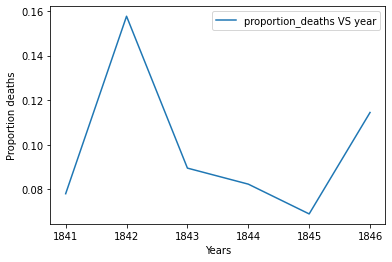

In [ ]:
#plotting for clininc-1
ax1 = yearly1.plot(x="year", y="proportion_deaths",label="proportion_deaths VS year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Proportion deaths")
plt.show()

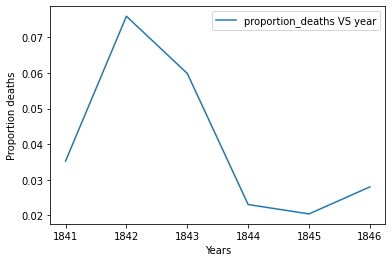

In [ ]:
#plotting for clininc-2
ax2 = yearly2.plot(x="year", y="proportion_deaths",label="proportion_deaths VS year")
ax2.set_xlabel("Years")
ax2.set_ylabel("Proportion deaths")
plt.show()

# TASK 4
Load in the dataset with the monthly number of deaths for Clinic 1

In [2]:
monthly = pd.read_csv('datasets/monthly_deaths.csv',parse_dates=["date"])

In [3]:
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [4]:
monthly["proportion_deaths"] = monthly["deaths"]/monthly["births"]
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# TASK 5
Plot the monthly proportion of deaths for Clinic 1

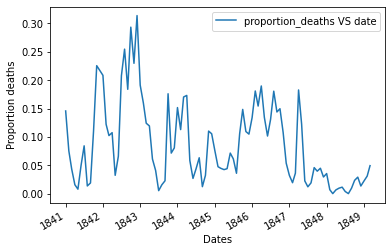

In [6]:
#plotting for clininc-2
import matplotlib.pyplot as plt

ax3 = monthly.plot(x="date", y="proportion_deaths",label="proportion_deaths VS date")
ax3.set_xlabel("Dates")
ax3.set_ylabel("Proportion deaths")
plt.show()

# TASK 6
Make a plot that highlights the effect of handwashing.


In [7]:
monthly['year'] = pd.DatetimeIndex(monthly['date']).year
monthly.head()

,date,births,deaths,proportion_deaths,year
0,1841-01-01,254,37,0.145669,1841
1,1841-02-01,239,18,0.075314,1841
2,1841-03-01,277,12,0.043321,1841
3,1841-04-01,255,4,0.015686,1841
4,1841-05-01,255,2,0.007843,1841


In [8]:
handwashing_start = 1847
monthly.year.dtype

dtype('int64')

In [9]:
#Data frame representing before handwashing started
before_washing = pd.DataFrame(monthly[monthly.year<handwashing_start])
before_washing.head()

,date,births,deaths,proportion_deaths,year
0,1841-01-01,254,37,0.145669,1841
1,1841-02-01,239,18,0.075314,1841
2,1841-03-01,277,12,0.043321,1841
3,1841-04-01,255,4,0.015686,1841
4,1841-05-01,255,2,0.007843,1841


In [11]:
#Data frame representing after handwashing started
after_washing = pd.DataFrame(monthly[monthly.year>=handwashing_start])
after_washing.head()

,date,births,deaths,proportion_deaths,year
71,1847-01-01,311,10,0.032154,1847
72,1847-02-01,312,6,0.019231,1847
73,1847-03-01,305,11,0.036066,1847
74,1847-04-01,312,57,0.182692,1847
75,1847-05-01,294,36,0.122449,1847


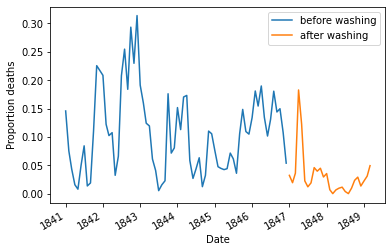

In [21]:
ax4 = before_washing.plot(x="date",y="proportion_deaths",label="before washing")
l = ax4.get_lines()
ax5 = after_washing.plot(ax=ax4,x='date',y='proportion_deaths',label="after washing")
ax5.set_xlabel("Date")
ax5.set_ylabel("Proportion deaths")
plt.show()

# TASK 7
Calculate the average reduction in proportion of deaths due to handwashing.


In [22]:
before_proportion = pd.Series(before_washing['proportion_deaths'])
after_proportion = pd.Series(after_washing['proportion_deaths'])

In [24]:
diff_mean_monthly_prop_of_deaths = abs(before_proportion.mean()-after_proportion.mean())
print("before proportion mean: ",before_proportion.mean())
print("after proportion mean: ",after_proportion.mean())
print("Difference in mean monthly proportion of deaths: ",diff_mean_monthly_prop_of_deaths)

before proportion mean:  0.10691840432632767
after proportion mean:  0.031727637898556225
Difference in mean monthly proportion of deaths:  0.07519076642777145


# TASK 8
Make a bootstrap analysis of the difference in mean monthly proportion of deaths.

In [25]:
mean_diff = diff_mean_monthly_prop_of_deaths

In [ ]:
boot_mean_diff = []
for i in range(3000):
  boot_before = before_washing['proportion_deaths'].sample(frac=1,replace=True)
  boot_after = after_washing['proportion_deaths'].sample(frac=1,replace=True)
  diff = abs(boot_before.mean()-boot_after.mean())
  boot_mean_diff.append(diff)
boot_mean_diff[:100]

In [32]:
#calculate a 95% confidence interval using pandas
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.052505
0.975    0.096387
dtype: float64

# TASK 9
Given the data Semmelweis collected, is it True or False that doctors should wash their hands?

In [34]:
doctors_should_wash_their_hands = True
doctors_should_wash_their_hands

True